In [1]:
# importing the pandas module
import pandas as pd

# importing the dataset
Dushanbe = pd.read_csv('Dushanbe_house.csv')

# printing the heading
Dushanbe.head()

,Unnamed: 0,number_of_rooms,floor,area,latitude,longitude,price
0,0,1,1,58.0,38.585834,68.793715,330000
1,1,1,14,68.0,38.522254,68.749918,340000
2,2,3,8,50.0,NaN,NaN,700000
3,3,3,14,84.0,38.520835,68.747908,700000
4,4,3,3,83.0,38.564374,68.739419,415000


In [2]:
Dushanbe.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
Dushanbe.head()

,number_of_rooms,floor,area,latitude,longitude,price
0,1,1,58.0,38.585834,68.793715,330000
1,1,14,68.0,38.522254,68.749918,340000
2,3,8,50.0,NaN,NaN,700000
3,3,14,84.0,38.520835,68.747908,700000
4,3,3,83.0,38.564374,68.739419,415000


In [4]:
# removing the null values
Dushanbe.dropna(axis=0, inplace=True)

# all null values
Dushanbe.isnull().sum()


number_of_rooms    0
floor              0
area               0
latitude           0
longitude          0
price              0
dtype: int64

In [5]:
# importing the plotly module
import plotly.express as px

# plotting 3-d plot
fig = px.scatter_3d(Dushanbe, x='number_of_rooms', y='area', z='price',
              color='price')
fig.show()

In [6]:
from sklearn.linear_model import Ridge
# taking the columns from the dataset
columns = Dushanbe.columns

# storing the input and output variables
Inputs = Dushanbe[columns[0:-1]]
outputs = Dushanbe[columns[-1]]

In [7]:
# importing the module
from sklearn.model_selection import train_test_split

# splitting dataset
X_train, X_test, y_train, y_test = train_test_split( Inputs, outputs, test_size=0.25, random_state=42)

In [8]:
# lambda value 0.9
model = Ridge(alpha=0.9)

# Training the model
model.fit(X_train, y_train)

Ridge(alpha=0.9)

In [9]:
# making predictions
y_pred = model.predict(X_test)

In [21]:
# Importing the required module
from sklearn.metrics import  r2_score
from sklearn.metrics import mean_squared_error


# Evaluating model performance
print('R-square score is :', r2_score(y_test, y_pred))
print("Mean square error is: ", mean_squared_error(y_test, y_pred))

R-square score is : 0.3719095680164939
Mean square error is:  147226751247.37512


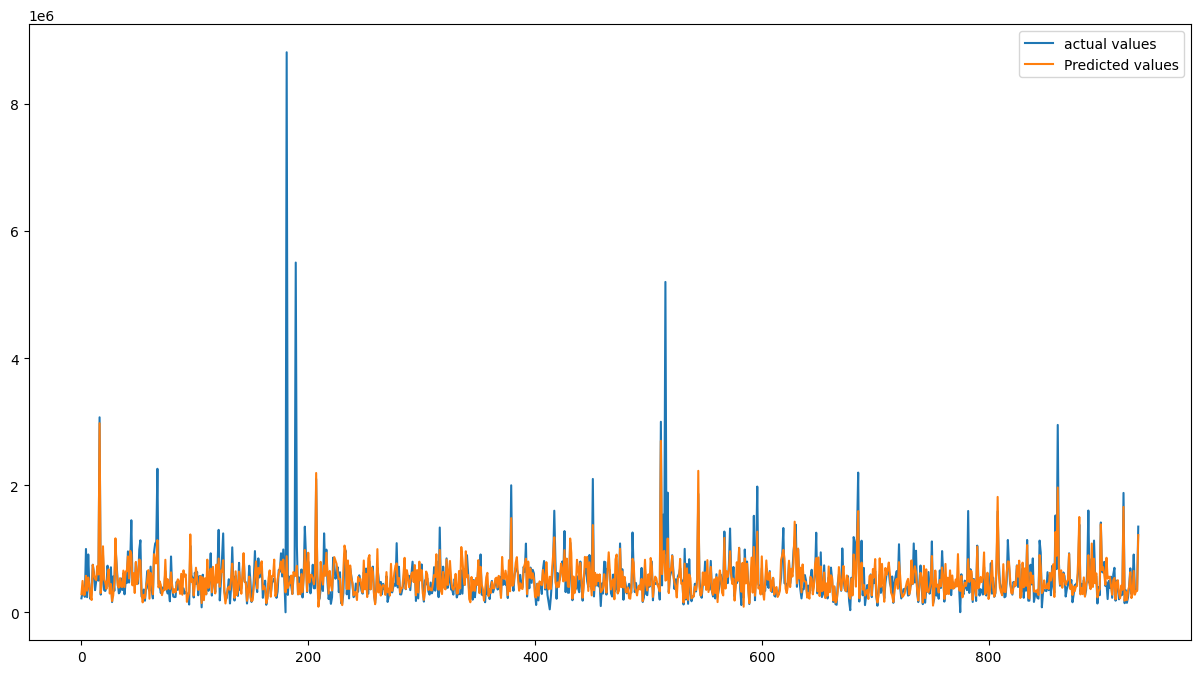

In [11]:
# importing the module
import matplotlib.pyplot as plt

# fitting the size of the plot
plt.figure(figsize=(15, 8))

# plotting the graphs
plt.plot([i for i in range(len(y_test))],y_test, label="actual values")
plt.plot([i for i in range(len(y_test))],y_pred, label="Predicted values")

# showing the plotting
plt.legend()
plt.show()

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange

model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='r2', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: 0.560
Config: {'alpha': 0.99}


In [13]:
# define model
model = Ridge(alpha=0.09)
model.fit(X_train, y_train)

Ridge(alpha=0.09)

In [14]:
y_pred = model.predict(X_test)

In [15]:
# Importing the required module
from sklearn.metrics import  r2_score

# Evaluating model performance
print('R-square score is :', r2_score(y_test, y_pred))

R-square score is : 0.3719095680164939


In [16]:
# importing the required module
from sklearn.linear_model import  Lasso

# initializing the mode
lasso_model = Lasso(alpha=0.9)

# training the model
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.9)

In [17]:
# making predictions using lasso model
lasso_predictions = lasso_model.predict(X_test)

In [18]:
# Evaluating model performance
print('R-square score is :', r2_score(y_test, lasso_predictions))



R-square score is : 0.3720066441667519


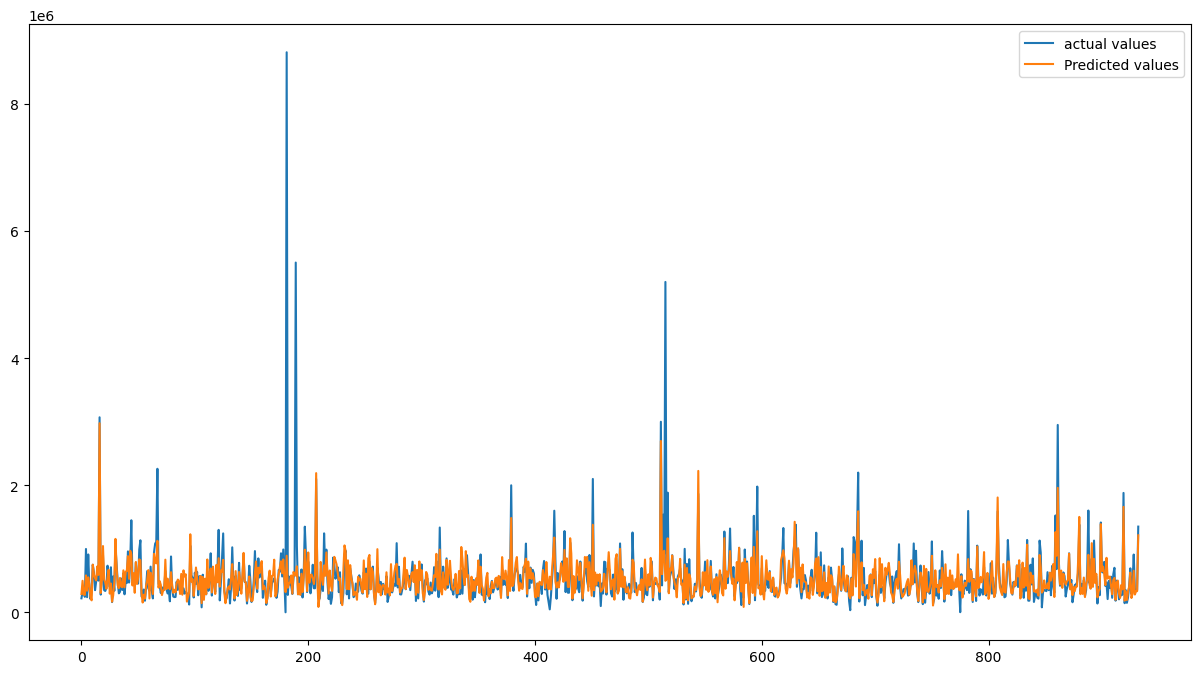

In [19]:
# fitting the size of the plot
plt.figure(figsize=(15, 8))

# plotting the graphs
plt.plot([i for i in range(len(y_test))],y_test, label="actual values")
plt.plot([i for i in range(len(y_test))],lasso_predictions, label="Predicted values")

# showing the plotting
plt.legend()
plt.show()

In [20]:
# Importing linear regression form sklear
from sklearn.linear_model import LinearRegression

# initializing the algorithm
regressor = LinearRegression()

# Fitting Simple Linear Regression to the Training set
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_predictions = regressor.predict(X_test)